<a href="https://colab.research.google.com/github/AlexPNO/Data_Science/blob/master/Analisando_os_Dados_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Nessa etapa iremos importar bibliotecas do python que nos permitem trabalhar com
o dataset referente a cidade do Rio de Janeiro retirado do portal Inside Airbnb, e em seguida importar o arquivo através da função read_csv e do link para o dataset


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/visualisations/listings.csv')


## Análise dos Dados


**Dicionário das variáveis**

* **id** número de identitidade do imóvel no Airbnb.
* **name** descrição sucinta do imóvel.
* **host_id** número de identidade do locador do imóvel.
* **host_name**  nome do locador do imóvel.
* **neighbourhood_group**  distrito onde se localiza o bairro
* **neighbourhood**	bairro em que se localiza o imóvel.
* **latitude** latitude onde se encontra o imóvel
* **longitude** longitude onde se encontra o imóvel
* **room_type** Tipo do imóvel: casa, apartamento, quarto privado e etc.
* **price** Preço em reais por dia
* **minimum_nights** número mínimo de noites para que se alugue o local
* **number_of_reviews** número de avaliações do local
* **last_review** data da última avaliação
* **reviews_per_month** número de avaliações por mês
* **calculated_host_listings_count** quantidade de imóveis do mesmo anfitrião
* **availability_365** número de dias no ano que o local está disponível para alugar










Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,188,7,251,2020-04-06,2.09,1,335
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,442,5,94,2020-03-22,1.23,1,90
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.96,3,129
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,359,2,282,2020-03-02,2.35,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,495,2,181,2020-03-15,2.25,1,357


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print(f"Número de linhas do dataset:{df.shape[0]}" )
print(f'Número de colunas do dataset:{df.shape[1]}' )

# verificar as 5 primeiras entradas do dataset
df.dtypes

Número de linhas do dataset:35793
Número de colunas do dataset:16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df_null = df.isnull().sum().sort_values(ascending = False)
print('Porcentagem de valores faltantes em cada coluna:\n')
print(df_null/df.shape[0])

Porcentagem de valores faltantes em cada coluna:

neighbourhood_group               1.00000
reviews_per_month                 0.41645
last_review                       0.41645
name                              0.00162
host_name                         0.00014
availability_365                  0.00000
calculated_host_listings_count    0.00000
number_of_reviews                 0.00000
minimum_nights                    0.00000
price                             0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
host_id                           0.00000
id                                0.00000
dtype: float64


In [7]:
#a coluna neighbourhood_group não apresenta valores, postanto será descartada
df = df.drop(columns = ['neighbourhood_group'])

### **Q3. Qual o tipo de distribuição das variáveis?** 

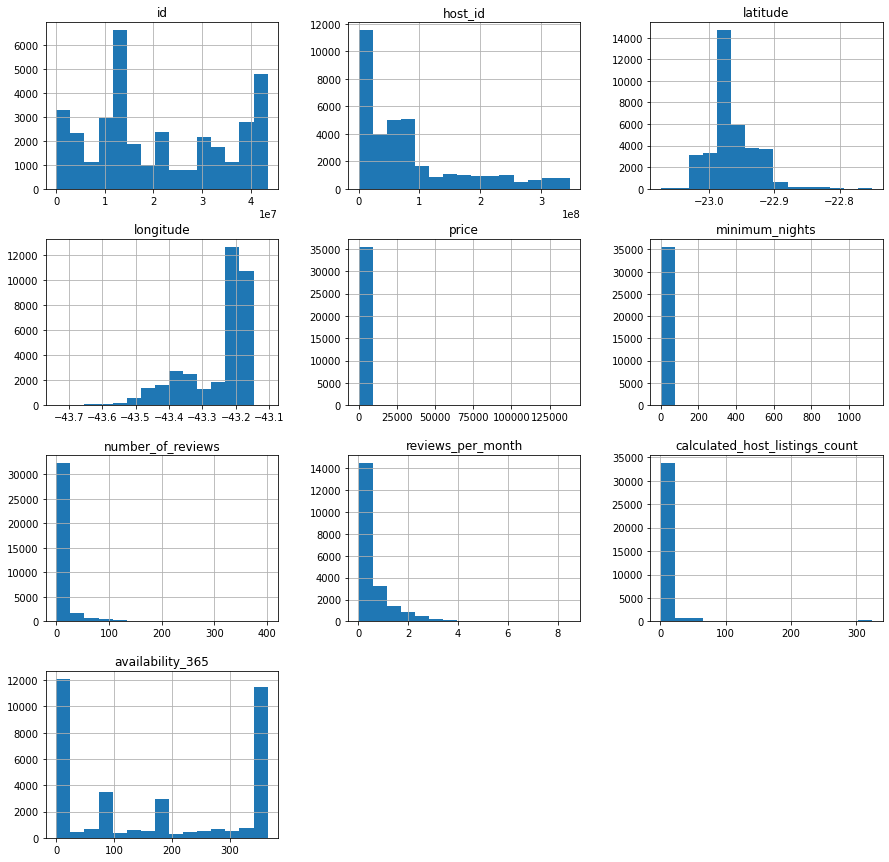

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(15,15),bins = (15));


Pelo histograma é possível perceber que não há muita variação entre os valores de latitude e longitude, por se considerar a análise em apenas uma cidade e as coordenadas geograficas dos imóveis para alugar estarem em determinados bairros, host_id e id são chaves que representam os imóveis e os locadores apresentam uma maior dispersão nos números, mas é será analisado se existe alguma correlação entre eles

### **Q4. Qual a média dos preços de aluguel?**

In [9]:
# ver a média da coluna `price``
print('A média de preço por noite é:',df.price.mean(),'reais')


A média de preço por noite é: 795.6178582404381 reais


In [10]:
# A média dos preços dos imóveis é de 795 reais, mas será que existe algum outlier puxando a média pra ciama? vamos veriicar com describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.579300e+04,3.579300e+04,35793.000000,35793.000000,35793.000000,35793.000000,35793.000000,20887.000000,35793.000000,35793.000000
mean,2.129684e+07,8.492397e+07,-22.965216,-43.252227,795.617858,4.797586,9.747576,0.581955,8.189059,171.900455
std,1.368508e+07,8.916201e+07,0.034889,0.096912,2452.937585,21.844137,25.828574,0.763331,34.830690,154.647434
min,1.787800e+04,1.173900e+04,-23.073400,-43.737090,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.098687e+07,1.508375e+07,-22.984560,-43.319590,159.000000,1.000000,0.000000,0.120000,1.000000,0.000000
50%,1.704652e+07,5.640055e+07,-22.970660,-43.198720,299.000000,2.000000,1.000000,0.300000,1.000000,160.000000
75%,3.428384e+07,1.118898e+08,-22.946930,-43.186480,649.000000,4.000000,6.000000,0.720000,3.000000,362.000000
max,4.352478e+07,3.468845e+08,-22.750380,-43.104620,138288.000000,1123.000000,401.000000,8.490000,324.000000,365.000000


Ao investigar o preço descobrimos que existe um outlier no valor máximo além de um outlier no valor máximo do mínimo de noites, os dois poderiam ser retirados do dataset para obter números mais confiáveis na análise 

### **Q4. Investigando outliers**

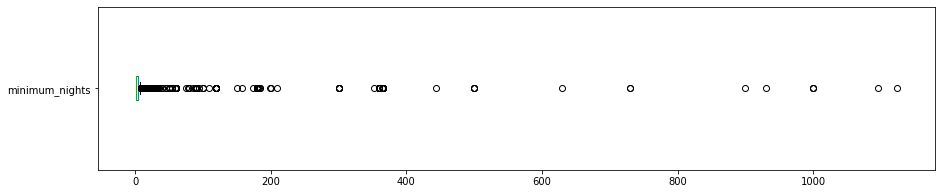

Valor de entradas maiores do que 30:
229 entradas
0.6398%


In [11]:
#Usando boxplots investigaremos mais a fundo os ouliers e veremos o numero de entradas acima de 30 dias, para ver sua representatividade nos dados
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
print("Valor de entradas maiores do que 30:")
print("{} entradas".format(len(df[df.minimum_nights>30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))




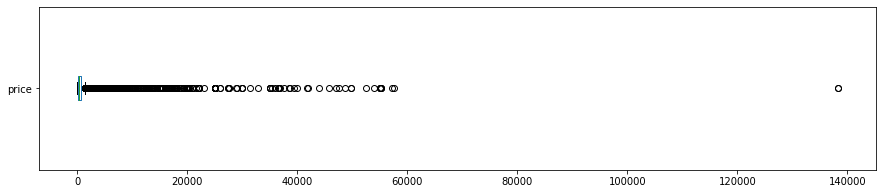

Valor de entradas maiores do que 3000:
1422 entradas
3.9728%


In [12]:
# veremos a quantidado de dados existentes para o numero de preço estipulado 3000 a fim de retirarmos os outliers do dataset
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
print("Valor de entradas maiores do que 3000:")
print("{} entradas".format(len(df[df.price>3000])))
print("{:.4f}%".format((len(df[df.price > 3000]) / df.shape[0])*100))

In [13]:
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price > 3000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

### **Q4. Qual a correlação existente entre as variáveis**

In [14]:
# criar uma matriz de correlação para ver se existe alguma relação forte entre as variáveis
corr = df_clean.corr()

# mostrar a matriz de correlação
corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588408,-0.019230,0.011176,-0.188245,-0.107846,-0.224269,0.135171,0.074351,-0.014304
host_id,0.588408,1.000000,0.022869,-0.088198,-0.128390,-0.069400,-0.142799,0.080695,-0.058623,-0.011121
latitude,-0.019230,0.022869,1.000000,0.353041,-0.169860,-0.059259,-0.056605,-0.039306,-0.069113,0.000124
longitude,0.011176,-0.088198,0.353041,1.000000,-0.139311,-0.068870,0.128151,0.083866,0.086791,-0.027360
price,-0.188245,-0.128390,-0.169860,-0.139311,1.000000,0.178383,-0.160525,-0.160703,0.024827,-0.031440
minimum_nights,-0.107846,-0.069400,-0.059259,-0.068870,0.178383,1.000000,-0.058371,-0.059751,-0.033931,-0.027525
number_of_reviews,-0.224269,-0.142799,-0.056605,0.128151,-0.160525,-0.058371,1.000000,0.705183,-0.022870,0.049898
reviews_per_month,0.135171,0.080695,-0.039306,0.083866,-0.160703,-0.059751,0.705183,1.000000,-0.017978,-0.022216
calculated_host_listings_count,0.074351,-0.058623,-0.069113,0.086791,0.024827,-0.033931,-0.022870,-0.017978,1.000000,0.076126
availability_365,-0.014304,-0.011121,0.000124,-0.027360,-0.031440,-0.027525,0.049898,-0.022216,0.076126,1.000000


In [15]:
# plotar um heatmap a partir das correlações
corr.style.background_gradient(cmap = 'coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588408,-0.019230,0.011176,-0.188245,-0.107846,-0.224269,0.135171,0.074351,-0.014304
host_id,0.588408,1.000000,0.022869,-0.088198,-0.128390,-0.069400,-0.142799,0.080695,-0.058623,-0.011121
latitude,-0.019230,0.022869,1.000000,0.353041,-0.169860,-0.059259,-0.056605,-0.039306,-0.069113,0.000124
longitude,0.011176,-0.088198,0.353041,1.000000,-0.139311,-0.068870,0.128151,0.083866,0.086791,-0.027360
price,-0.188245,-0.128390,-0.169860,-0.139311,1.000000,0.178383,-0.160525,-0.160703,0.024827,-0.031440
minimum_nights,-0.107846,-0.069400,-0.059259,-0.068870,0.178383,1.000000,-0.058371,-0.059751,-0.033931,-0.027525
number_of_reviews,-0.224269,-0.142799,-0.056605,0.128151,-0.160525,-0.058371,1.000000,0.705183,-0.022870,0.049898
reviews_per_month,0.135171,0.080695,-0.039306,0.083866,-0.160703,-0.059751,0.705183,1.000000,-0.017978,-0.022216
calculated_host_listings_count,0.074351,-0.058623,-0.069113,0.086791,0.024827,-0.033931,-0.022870,-0.017978,1.000000,0.076126
availability_365,-0.014304,-0.011121,0.000124,-0.027360,-0.031440,-0.027525,0.049898,-0.022216,0.076126,1.000000


A partir desse heatmap não obtivemos relações fortes entre variáveis ao nível de estabelecer alguma relação direta ou inversa entre as variáveis. As variáveis que obtiveram a maior relação entre si foram id e host_id com aproximadamente 60%, mas essas variáveis não nos permitem fazer nenhuma inferencia com relação as localidades e os preços. Outras variáveis que se relacionam entre si fortemente são o numero de reviews e o numero de reviews por mês, algo já esperado e que não acrescenta insights na nossa análise

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Para considerar os imóveis mais alugados retiramos os imóveis que não estão disponíveis ao longo do ano, considerando o novo dataset as linhas onde availability_365 é maior que 0

In [16]:
# imoveis disponiveis sao os que se encontram disponiveis pelo menos um ia no ano
df_disp=df_clean.where(df['availability_365']>0)

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
contagem=df_disp.value_counts('room_type')
print(contagem)

room_type
Entire home/apt    16855
Private room        6389
Shared room          603
Hotel room           124
dtype: int64


In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(contagem/df_disp.shape[0])*100



room_type
Entire home/apt    49.348558
Private room       18.705900
Shared room         1.765481
Hotel room          0.363051
dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [19]:
# ver preços por bairros, na média
df_disp.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Caju                      1199.000000
Benfica                   1131.333333
Joá                        936.369565
Ricardo de Albuquerque     899.800000
Vaz Lobo                   826.000000
                             ...     
Colégio                     70.000000
Vila Militar                70.000000
Vista Alegre                70.000000
Honório Gurgel              65.000000
Gericinó                    49.000000
Name: price, Length: 153, dtype: float64

In [20]:
# Realizando uma pesquisa constatei que imóveis em bairros como Leblon, Ipanema e Lagoa são bairros mais caros do que os que apareceram no topo dessa lista, coletando dados:
print(df_disp[df_disp.neighbourhood=='Caju'].shape)
print(df_disp[df_disp.neighbourhood=='Benfica'].shape)
print(df_disp[df_disp.neighbourhood=='Joá'].shape)


(1, 15)
(6, 15)
(46, 15)


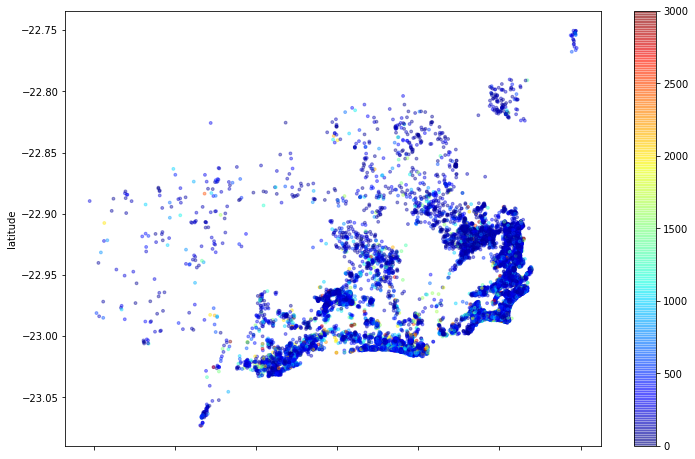

In [21]:
# plotar os imóveis pela latitude-longitude
df_disp.plot(kind='scatter',x='longitude',y='latitude',c=df_disp['price'],s=8,cmap=plt.get_cmap('jet'),alpha=0.4,figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [22]:
# ver a média da coluna `minimum_nights``
print("A média do número mínimo de noites é:",df_disp.minimum_nights.mean())

A média do número mínimo de noites é: 3.5348128989195278


## Conclusões
